### Import Libraries

In [2]:
# Importing the required libraries

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import style
import random
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import os

### Import Dataset

In [4]:
# importing the datasets
df1 = pd.read_csv("google-stock-dataset-Daily.csv")
df2 = pd.read_csv("google-stock-dataset-Monthly.csv")
df3 = pd.read_csv("google-stock-dataset-Weekly.csv")

### Data Preprocessing

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2510 non-null   int64  
 1   Date        2510 non-null   object 
 2   Price       2510 non-null   float64
 3   High        2510 non-null   float64
 4   Low         2510 non-null   float64
 5   Close       2510 non-null   float64
 6   Volume      2510 non-null   int64  
 7   Adj Close   2510 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 157.0+ KB


Setting Company Name as Index and changing the Datatype of Date column to 'datetime64'

In [8]:
df1.drop(['Unnamed: 0'],axis=1,inplace=True)
df2.drop(['Unnamed: 0'],axis=1,inplace=True)
df3.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df1.rename(columns={'Price':'Open'},inplace=True)
df2.rename(columns={'Price':'Open'},inplace=True)
df3.rename(columns={'Price':'Open'},inplace=True)

In [10]:
def set_ind(df,cmp_name='Google'):
    df['Date'] = df['Date'].apply(pd.to_datetime)
    df['Company']=cmp_name
    df.set_index('Company',inplace=True)

In [11]:
set_ind(df1)
set_ind(df2)
set_ind(df3)

In [12]:
df1.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Company,,,,,,,
Google,2013-04-15,19.67,19.94,19.44,19.57,98025876,19.57
Google,2013-04-16,19.68,19.92,19.62,19.85,69610320,19.85
Google,2013-04-17,19.69,19.79,19.47,19.58,81398520,19.58
Google,2013-04-18,19.65,19.66,19.05,19.17,132767100,19.17
Google,2013-04-19,19.25,20.11,19.18,20.02,231895872,20.02


In [13]:
df2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Company,,,,,,,
Google,2013-05-01,20.60,23.04,20.43,21.80,1974715308,21.80
Google,2013-06-01,21.85,22.79,21.20,22.03,1941280776,22.03
Google,2013-07-01,22.18,23.22,21.91,22.22,2047770180,22.22
Google,2013-08-01,22.40,22.77,21.16,21.19,1338144516,21.19
Google,2013-09-01,21.38,22.67,21.37,21.92,1323615060,21.92


In [14]:
df3.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Company,,,,,,,
Google,2013-04-15,19.67,20.11,19.05,20.02,613697688,20.02
Google,2013-04-22,20.04,20.47,19.39,20.06,458928612,20.06
Google,2013-04-29,20.10,21.19,20.10,21.16,423312264,21.16
Google,2013-05-06,21.23,22.04,21.23,22.03,426249324,22.03
Google,2013-05-13,21.99,23.02,21.86,22.75,520091388,22.75


### Exploratory Data Analysis

Analysing Vulumes of Stock Traded

In [17]:
def volume_analysis(df,cmp):
    plt.figure(figsize=(10,5))
    plt.plot(df['Date'],df['Volume'],c='orange')
    plt.title('Volume Of '+cmp+' Stock Traded')
    plt.ylabel('Volume')
    plt.show()

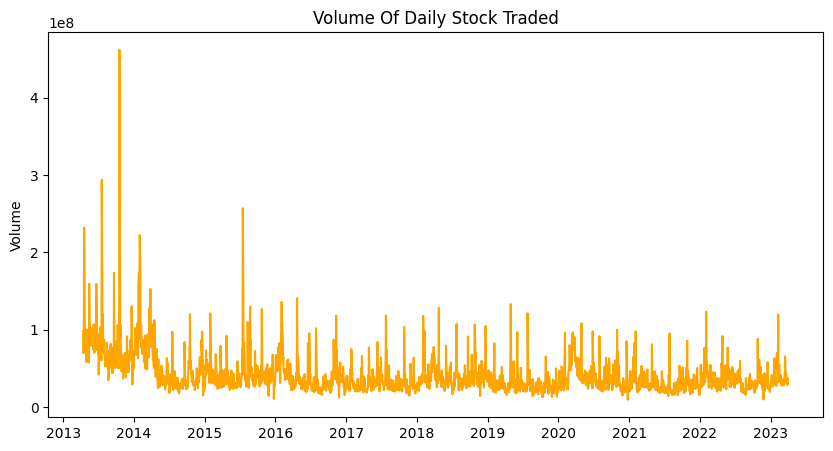

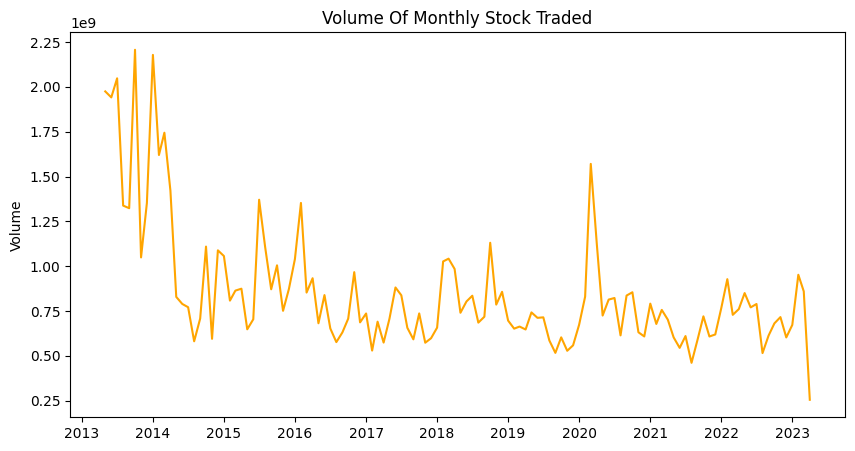

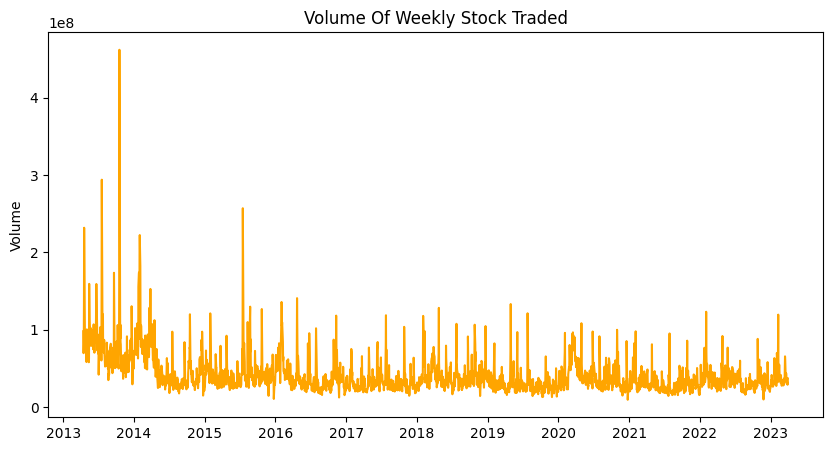

In [18]:
volume_analysis(df1,'Daily')
volume_analysis(df2,'Monthly')
volume_analysis(df1,'Weekly')

Analysing Opening and Closing price trends

In [20]:
def price(df,name):    
    fig=px.histogram(df,x='Date',y=['Open','Close'],
            template='plotly_dark',
            color_discrete_sequence=['gold','snow'],
            title='{}     Opening and Closing Stock Price Over Time'.format(name)
               )
    fig.update_layout(
    xaxis_title="Date", yaxis_title="Stock Price"
    )
    fig.show()

In [21]:
print('PLOTS OF OPENING AND CLOSING PRICE')
print('\n\n\n')
price(df1,'Daily')
print('\n\n\n')
price(df1,'Monthly')
print('\n\n\n')
price(df1,'Weekly')
print('\n\n\n')

PLOTS OF OPENING AND CLOSING PRICE






A comparitive analysis of the high and low prices of stock over the years showing change in the daily range of trading.

In [23]:
def high_low(df):
    plt.figure(figsize=(20,8))
    plt.style.use('classic')
    df['Daily Range']= df['High']-df['Low']
    plt.plot(df['Date'],df['Daily Range'],c='blue')
    plt.xlabel("Years")
    plt.ylabel("Stock Price Trading Range") 
    plt.title("Daily Stock Price Range for Google")
    plt.show()

PLOTS OF DAILY TRAIDNG RANGE






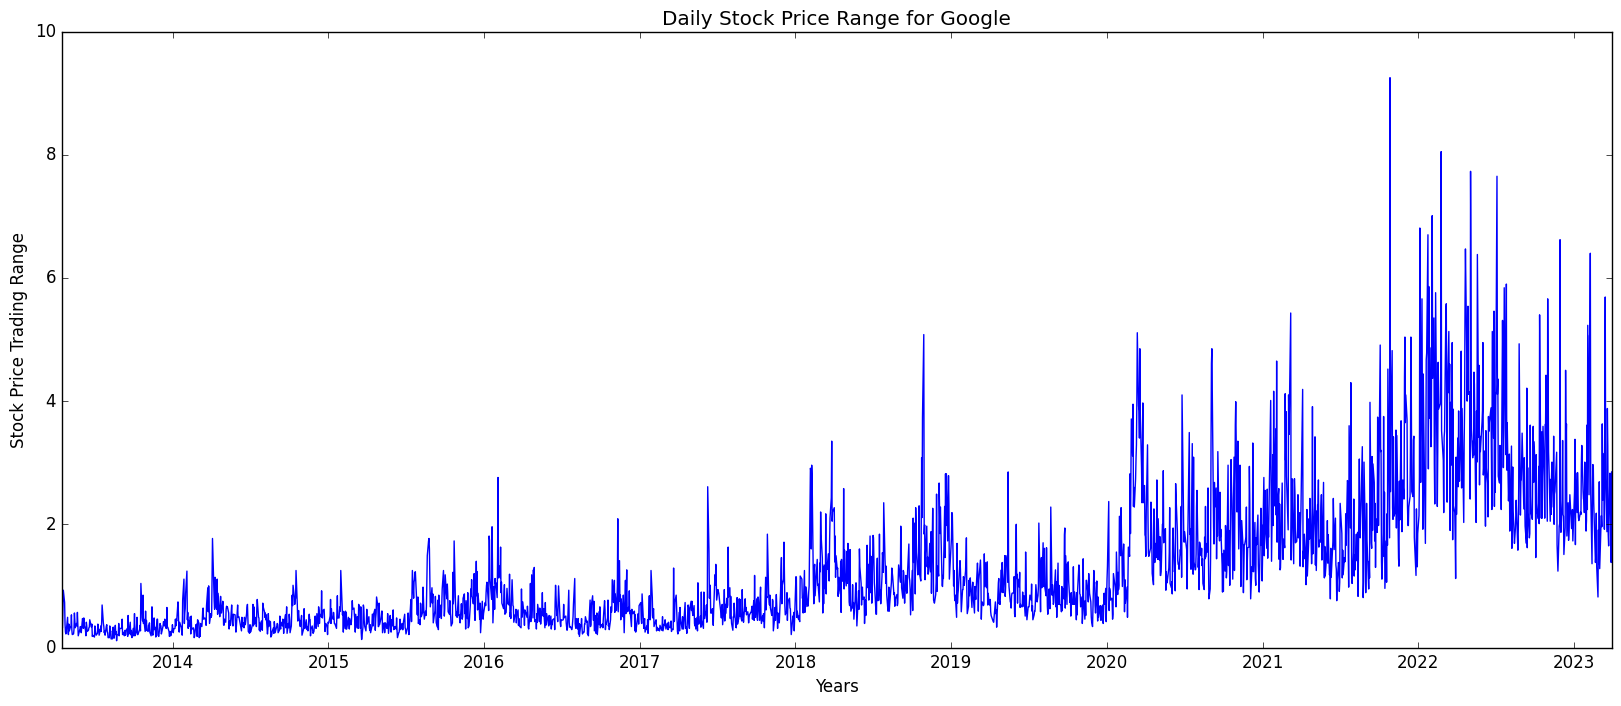

In [24]:
print('PLOTS OF DAILY TRAIDNG RANGE')
print('\n\n\n')
high_low(df1)

Analysing the Daily Returns on Stock

In [26]:
def daily_returns(df):
    df['Daily Return'] = df['Adj Close'].pct_change() 
    #We chose Adj Close here because it is inidicated as the fair price of the stock on that day. 
    #However you may also take CLose price for the analysis.\
    fig=px.histogram(df,x='Date',y='Daily Return',
                     template='plotly_dark',
                     nbins=60,
                     
                     color_discrete_sequence=['cyan'],
                     title='Daily Returns on stock')
    
    fig.update_layout(
    xaxis_title="Date", yaxis_title="Daily Returns(%)"
    )
    
    fig.show()


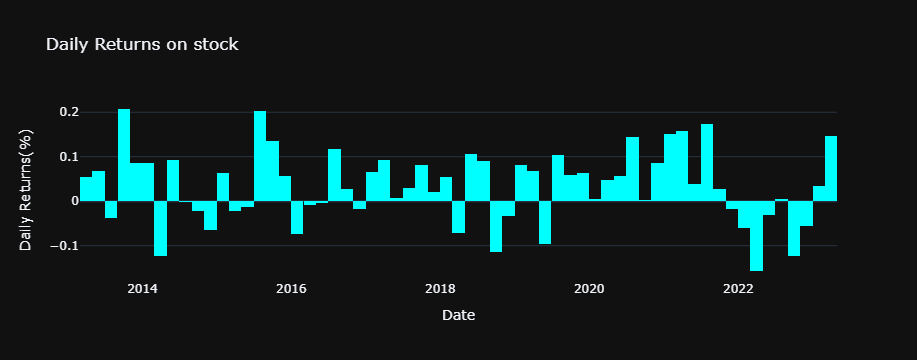

In [27]:
daily_returns(df1)